# Market Rates API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/MarketRatesAPI/MarketRatesAPI.ipynb) 

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [14]:
signal_ocean_api_key = '' #replace with your subscription key

## Market Rates API
The Market Rates API retrieves available routes and market rates. First create connection towards
Market Rates API in order to find available routes by vessel class:

In [15]:
from signal_ocean import Connection, MarketRatesAPI
from datetime import date

connection = Connection(api_key=signal_ocean_api_key)
mr_api = MarketRatesAPI(connection)

#### Get the available vessel classes
Retrieve the vessel classes for which we can get routes or market rates:

In [16]:
vessel_classes = mr_api.get_vessel_classes()
print(vessel_classes)

(VesselClass(id=60, vessel_type_id=6, from_size=70001, to_size=250000, name='VLGC', vessel_type='LPG', defining_size='CubicSize', size='cbm'), VesselClass(id=61, vessel_type_id=6, from_size=28001, to_size=70000, name='Midsize/LGC', vessel_type='LPG', defining_size='CubicSize', size='cbm'), VesselClass(id=62, vessel_type_id=6, from_size=10001, to_size=28000, name='Handy', vessel_type='LPG', defining_size='CubicSize', size='cbm'), VesselClass(id=63, vessel_type_id=6, from_size=0, to_size=10000, name='Small', vessel_type='LPG', defining_size='CubicSize', size='cbm'), VesselClass(id=69, vessel_type_id=3, from_size=220000, to_size=550000, name='VLOC', vessel_type='Dry', defining_size='DeadWeight', size='kt'), VesselClass(id=70, vessel_type_id=3, from_size=120000, to_size=219999, name='Capesize', vessel_type='Dry', defining_size='DeadWeight', size='kt'), VesselClass(id=72, vessel_type_id=3, from_size=85000, to_size=119999, name='Post Panamax Dry', vessel_type='Dry', defining_size='DeadWeight

#### Get routes for a vessel class
Based on the vessel classes that we got above we can request available routes for VLCC vessels

In [17]:
vlcc_vessel_class = next(vc for vc in vessel_classes if vc.name=='VLCC')
vlcc_routes = mr_api.get_routes(vessel_class_id=vlcc_vessel_class.id)
print(vlcc_routes)

(Route(id='R5', description='VLCC - AG_FarEast', unit='WS', vessel_class_id=84, is_clean=False), Route(id='R6', description='VLCC - AG_Spore', unit='WS', vessel_class_id=84, is_clean=False), Route(id='R7', description='VLCC - AG_USG', unit='WS', vessel_class_id=84, is_clean=False), Route(id='R8', description='VLCC - WAfr_East', unit='WS', vessel_class_id=84, is_clean=False))


#### Get the market rates
Now we can request the market rate on a given date for one of the routes we got in previous step or
for all routes matching this vessel class

In [18]:
mr_api.get_market_rates(date(2020, 1, 2), route_id=vlcc_routes[0].id)
mr_api.get_market_rates(date(2020, 1, 2), vessel_class_id=vlcc_vessel_class.id)

(MarketRate(route_id='R8', rate_date='2020-01-02', rate_value=127.5, unit='WS', vessel_class_id=84),
 MarketRate(route_id='R7', rate_date='2020-01-02', rate_value=66.0, unit='WS', vessel_class_id=84),
 MarketRate(route_id='R5', rate_date='2020-01-02', rate_value=144.5, unit='WS', vessel_class_id=84),
 MarketRate(route_id='R6', rate_date='2020-01-02', rate_value=145.0, unit='WS', vessel_class_id=84))

We can also see how market rates evolve on the routes of a certain vessel class for a given time period.
Below we plot the VLCC market rates in WS from October through December 2020.

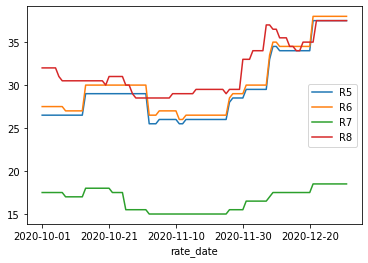

In [19]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

vlcc_rates = mr_api.get_market_rates(start_date=date(2020, 10, 1),
                                end_date=date(2020, 12, 31),
                                vessel_class_id=vlcc_vessel_class.id)
df = pd.DataFrame([vars(vr) for vr in vlcc_rates])
df.set_index('rate_date', inplace=True)
df.groupby('route_id')['rate_value'].plot(legend=True);